<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

![](assets/cover.png)

Over the past half decade, dark kitchens (also known as ghost kitchens, virtual kitchens, cloud kitchens) have become a widely adopted model in the food service industry. Dark kitchens are businesses that serve customers exclusively via delivery and pick-up. This model enables businesses to detach and optimise their delivery business from in-house business. Delivery businesses can instead be based from non-residential locations such an industrial site with reduced overhead and operating costs.

Whilst the dark kitchens were initially associated with [New York's unregulated kitchens](https://www.nbcnewyork.com/news/local/seamless-restaurant-grubhub-fake-eatery-unregulated-kitchen-investigation-i-team-new-york-city/2013699/) operating from residential addresses advertising via Grubhub, - now highly regulated sites - offering jobs, serving customers in underserved areas.

Prohibitive costs and financial risk of setting up restaurants in city centre locations - high demand for takeaways and delivery in residential areas where restaurants aren't based - enable restaurants to reach customers in areas they aren't based and for people to eat food at home rather than travelling to city centre.

Tech angle 
- containerised - load balanced
- analytics - planning
- [civic intelligence](https://medium.com/civic-intelligence/data-driven-dark-kitchens-da9ea72644ff)
- [industry solutions](https://www.oracle.com/in/food-beverage/cloud-kitchens/#:~:text=A%20cloud%20kitchen%20utilizes%20a,virtual%20brand%20at%20minimal%20cost.)

## Mapping Dark Kitchens

To the best of our knowledge, a map of UK dark kitchens does not exist. This is a feasibility study to see how possible it is to track these sites. 
Understand urban space and planning. New typologies of space- utilising otherwise dead space, catering for large populations. What successes they achieve and potential design flaws. If this innovative model is able to replicate- what potential is there for adaptation and progressive use in current state of the country where food banks - misalignment of ... 
- What did dark kitchens discover... 
- Successful in scaling 
- Pooling risk 
- Spatial planning
- Reducing travel
- Examples of planning food that have been coopted 

More space creative discussion but in this post I will focus on how to aquire data on these sites, focussing on Deliveroo. **As a caveat, all the data gathering and analysis was undertaken as of Wednesday 19th July. Data may no longer be available and Deliveroo may have changed their platform.** 

<!-- ![](assets/pkl.png) -->

## Dark Kitchen Partners


We can filter restaurants to find those based at Deliveroo Editions by adding `tags=deliveroo+editions` as a query string in our URL. For example to find all the restaurants at Deliveroo Editions delivering to Stepney Green, we can try `https://deliveroo.co.uk/restaurants/london/stepney-green?fulfillment_method=DELIVERY&tags=deliveroo+editions`:

![](assets/query.png)

If we check out Popeyes Louisiana Kitchen, we can find the name Deliveroo has given the editions site from the restaurant's url: `https://deliveroo.co.uk/menu/London/whitechapel-editions/popeyes-editions-wme/?day=today&geohash=gcpvngtckn3c&time=ASAP` which is in this case "Whitechapel Editions". Hence address of this restaurant in Deliveroo is also the address for the editions site at 10 Assembly Passage, London, E14UT, a [2-storey B-class office space with a disco ball included built in 1906](https://www.loopnet.co.uk/Listing/10-40-Assembly-Passage-London/8354101/) off the busy A11 road into central London.

![](assets/assembly.jpeg)

To find all the other restaurants based at the Whitechapel Editions kitchen, we could search for editions restaurants near the editions name: `https://deliveroo.co.uk/restaurants/london/whitechapel-editions?fulfillment_method=DELIVERY&category=deliveroo+editions`. We can deduce that all the restaurants based 0.0 miles away are those at the editions kitchen and can validate this by checking for `whitechapel-editions` in their urls. 

![](assets/whitechapel.png)

We can identify the following restaurants are based at Whitechapel: 
- Popeyes Louisiana Kitchen
- Yacob's Kitchen
- Remedy Kitchen
- So Noodle - 一汤一粉
- Hare & Tortoise
- 🌴 Poke Shack - Whitechapel🌴
- Zzetta - Soul Fired Pizza
- TRIP CBD Store
- Remeo Gelato
- Ice Cream Store (Editions Whitechapel)
- Ben & Jerry's Store (Editions Whitechapel)
- Tao Tao Ju 陶陶居
- Jude's Ice Cream
- Motu Indian Kitchen
- Dishoom

Using this approach, we can explore historic and current data to map these sites beyond Whitechapel.

## Historic Data

- We can find historic data on Deliveroo's dark kitchens from many sources including Deliveroo's website and news covering Deliveroo.
- Thankfully Deliveroo's website has been archived many times by the Internet Archive's Wayback Machine so we can view historic version of the site including promotions and searches.
- Example: the original press release for Deliveroo Editions in May 2017 as a 'concept that puts an end to postcode food envy'
- [30 locations across the UK by the end of the year](https://www.wired.co.uk/article/deliveroo-editions-local-restaurants), initially opening in Camberwell, Battersea, Dulwich and Canary Wharf
- [expansion to Singapore and Dubai](https://www.businessinsider.com/deliveroo-editions-pop-up-restaurants-roobox-2017-4?r=US&IR=T)

![](assets/editions_launch.png)

- As of July 2023, the Wayback Machine has archived 46 restaurant searches including the `tags=deliveroo+editions` filter in the url. We can see some editions facilities in these urls, including: Brighton Editions, Cambridge Editions, Leeds Editions, Acton Editions etc.
- Many of these urls have been 'captured' multiple times in history. With enough captures, we could make detailed analysis of changes in vendors at the sites and the growth of activity over time, however unfornately the data is too sparse to make these kinds of observations
- We can use the data to find restaurants that have based at these site some time in the past

![](assets/wayback.png)

With selenium, we can iterate through every capture extracting the restaurant names, restaurant urls, editions and timestamps to create a dataset like this:

In [ ]:
import pandas as pd 
df = pd.read_csv('data/editions_wayback.csv', usecols=['name','location','timestamps','timestamp_urls','restaurant_url'])
df.head()

,name,location,timestamps,timestamp_urls,restaurant_url
0,Oowee Vegan,brighton-editions,"['20201019', '20201021']",['https://web.archive.org/web/20201019/https:/...,https://deliveroo.co.uk/menu/brighton/brighton...
1,Shake Shack,brighton-editions,"['20201019', '20201021']",['https://web.archive.org/web/20201019/https:/...,https://deliveroo.co.uk/menu/brighton/brighton...
2,Lost Boys Chicken,hove,"['20201019', '20210618', '20210123', '20201021...",['https://web.archive.org/web/20201019/https:/...,https://deliveroo.co.uk/menu/brighton/hove/los...
3,The Athenian,brighton-editions,"['20201019', '20210618', '20210123', '20201021...",['https://web.archive.org/web/20201019/https:/...,https://deliveroo.co.uk/menu/brighton/brighton...
4,The Great British Cheesecake Company,brighton-editions,"['20201019', '20210618', '20210123', '20210511...",['https://web.archive.org/web/20201019/https:/...,https://deliveroo.co.uk/menu/brighton/brighton...


Of the ~550 restaurants scraped, we can view the most reoccuring and popular locations.
Despite Editions focus on restaurants, the most frequent options are cake and ice-cream with the Californian 'Halo Top' low-calorie ice cream taking the top spot. Motu Indian Kitchen, Pho and the Athenian and Dishoom are the most popular restaurants which is unsurprising given Motu Indian Kitchen and Dishoom are known to be long-time dark kitchen evangelists:

In [ ]:
import matplotlib.pyplot as plt

<Axes: ylabel='name'>

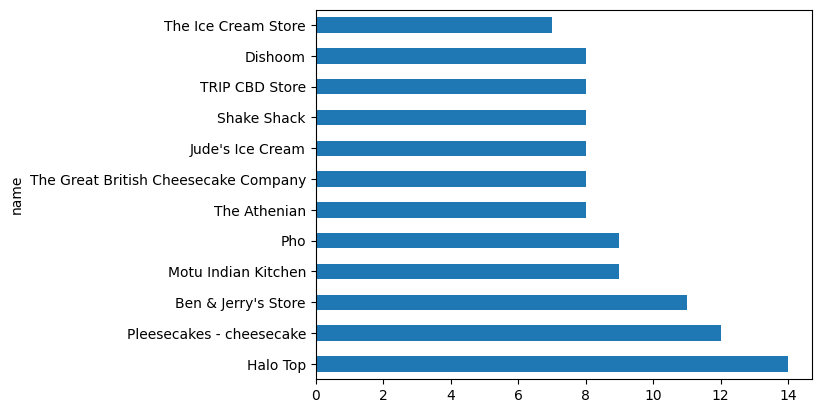

In [ ]:
df['name'].value_counts().head(12).plot.barh()

The most frequently appearing dark kitchens tend to be in London although Leeds and Manchester appear in the top 5: 

<Axes: ylabel='location'>

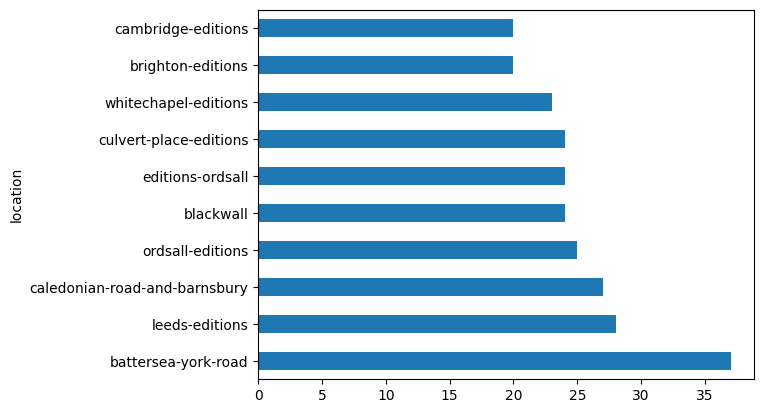

In [ ]:
df['location'].value_counts().head(10).plot.barh()

Is isn't possible to fairly compare the size editions or most popular partner due to the inequity in captures between locations across time. The spareseness of data also makes it impossible to measure the growth in a kitchen over time or growth in number of kitchens. 

However, using similar scraping approach in present time would allow for the busiest dark kitchens to be found and the most popular partner. 

## Present Data

- As mentioned, to the best of our knowledge, there is no existing map of dark kitchen sites.
- We can find many of them by searching but lack a strategy for finding all that currently exist.
  
- One approach to find many of the main sites would be to search the Food Standards Agency for businesses with "Deliveroo" in the title.
- Every kitchen in the UK requires an FSA rating
- Deliveroo's are all rated top marks. 

![](assets/fsa.png)

Whilst this covers Deliveroo's own kitchens, there are many restaurants listed as editions that don't operate at any of these sites, here is a handful of examples:

- Luxford Burgers, Sabor & Bulked - Loaded Fries (Broughton)
- Sprigg - Ingram Street (Glasgow City Centre)
- Pasta Evangelists (Wortley)

To get all of the restaurants we can search Deliveroo with a postcode from all of the ~2900 postcode districts in the UK filtering for editions. Whilst this is highly inefficient given that Deliveroo is not operating at most UK postcodes outside of cities and large towns, it does give a comprehensive picture. We can also use this relatively large scale scrape to find out which postcodes Deliveroo is operating in. This data could perhaps be a useful proxy for other phenomena.

In [ ]:
from IPython.display import HTML

HTML(filename="editions_extra.html")

As of July 2023, we find Deliveroo to be operating in x number of UK postcodes:

We also identify x-locations where Editions are based. Large facilities exist in:
- London
- Glasgow
- Leeds
- Manchester
- Nottingham
- Cambridge
- Bristol
- Brighton

Smaller outlets in: 
- Edinburgh
- Wigan
- Birmingham
- Reading

Editions with the most vendors: 

In [ ]:
df = pd.read_csv('editions_uk_18_7_23.csv', usecols=['name','location','edition', 'restaurant_url', 'address', 'lat', 'lon'])
df.head()

,name,location,edition,restaurant_url,address,lat,lon
0,Yacob's Kitchen,London,bsy-1-editions,https://deliveroo.co.uk/menu/London/bsy-1-edit...,"Unit 9, British Wharf, Landmann Way, London, S...",51.484623,-0.044459
1,Shake Shack – Burgers & Shakes,London,bsy-1-editions,https://deliveroo.co.uk/menu/London/bsy-1-edit...,"Unit 9, British Wharf, Landmann Way, London, S...",51.484623,-0.044459
2,Poke Shack,London,bsy-1-editions,https://deliveroo.co.uk/menu/London/bsy-1-edit...,"Unit 9, British Wharf, Landmann Way, London, S...",51.484623,-0.044459
3,Dishoom,London,bsy-2-editions,https://deliveroo.co.uk/menu/London/bsy-2-edit...,"145 Ormside Street, South Bermondsey, London, ...",51.483107,-0.055627
4,WING·STOP,London,bsy-2-editions,https://deliveroo.co.uk/menu/London/bsy-2-edit...,"145 Ormside Street, London, SE151TF",51.483107,-0.055627


In [ ]:
from IPython.display import IFrame
IFrame(src="data/editions_extra.html", width='100%', height='1000px')

<Axes: ylabel='location'>

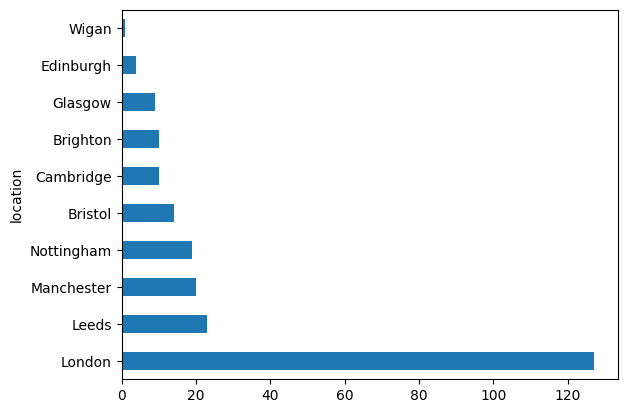

In [ ]:
df['location'].value_counts().head(10).plot.barh()

<Axes: ylabel='edition'>

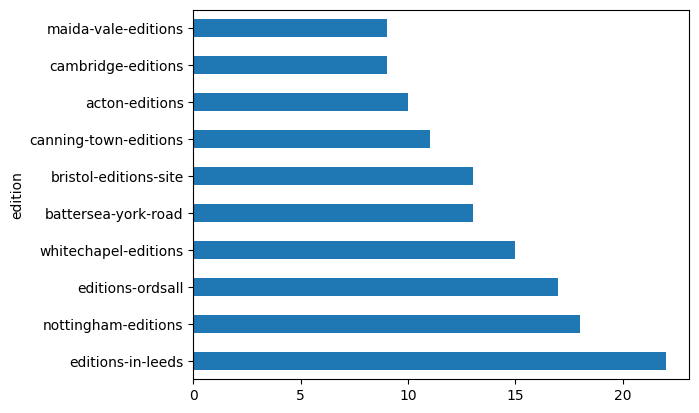

In [ ]:
df['edition'].value_counts().head(10).plot.barh()